# Plot dose depth dose and uncertainty

Use the output of the following simulation:
- Folder: exercices/
- Macros: ex1.mac


In [1]:
# Tell Jupyter to plot figure right in the page
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# Module with plot capabilities
import matplotlib.pyplot as plt
plt.style.use('../../../supplimentary_material/plotting_style_sheet.txt')

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Modules with reading/write folder/file functions
import os
from glob import glob
from scipy.optimize import curve_fit 

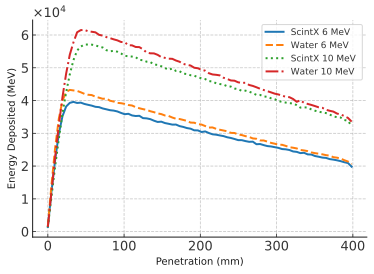

In [2]:
dose_files = glob('../output/*depth_dose-Edep.txt')

fig = plt.figure(facecolor='white', constrained_layout=False)
symbols = ['solid', 'dashed', 'dotted', 'dashdot']

for edep_file, symbol in zip(sorted(dose_files), symbols):
    edep_values = np.loadtxt(edep_file) # This will actually skip the lines begining with #
    energy, material, *_ = os.path.basename(edep_file).split('_')
    energy = int(energy.lstrip('E'))
    
    # The water is (50, 400, 400)mm and the profile is subdividing the 400mm*2 volume
    # into an amount of parts determined by the comments at the top of the file
    size = !grep Voxel {edep_file}
    x_step_size = float(size[0].split(',')[-1].rstrip(')'))
    x_values = np.arange(0, 400, x_step_size) # 400*2 because the mac defines half the length as 400mm
    
    # Plot every nth point to make it easier to add symbols instead of just colors
    nth = 12
    p = plt.plot(x_values[::nth], edep_values[::nth], 
                 linestyle=symbol,
                 linewidth=2,
                 #marker=symbol,
                 mfc='none', 
                 mec='black',
                 mew=.8,
                 ms=5,
                 label=f'{material} ${energy}$ MeV ')

    plt.legend(prop={'size':9})
    plt.xlabel('Penetration (mm)')
    plt.ylabel('Energy Deposited (MeV)')
    #plt.title('Water Equivalency (Longitudinal)')
    
ax = fig.get_axes()[0]
ax.ticklabel_format(axis='both',style='sci', scilimits=(0, 3), useMathText=True)
#fig.suptitle('Water Equivalency (Longitudinal)')
plt.savefig('../../../figures/water_equivalency/energy_depostition_longitude.pdf')

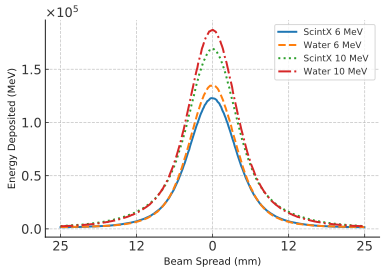

In [3]:
profile_files = glob('../output/*profile_dose-Edep.txt')

fig = plt.figure(facecolor='white', constrained_layout=False)
symbols = ['solid', 'dashed', 'dotted', 'dashdot']

for edep_file, linesytle in zip(sorted(profile_files), symbols):
    edep_values = np.loadtxt(edep_file) # This will actually skip the lines begining with #
    energy, material, *_ = os.path.basename(edep_file).split('_')
    energy = int(energy.lstrip('E'))

    # The water is (50, 400, 400)mm and the profile is subdividing the 50mm*2 volume
    # into an amount of parts determined by the comments at the top of the file
    size = !grep Voxel {edep_file}
    x_step_size = float(size[0].split(',')[0].split()[-1].lstrip('('))
    x_values = np.arange(-50, 50, x_step_size*2)
    
    # Plot every nth point to make it easier to add symbols instead of just colors
    nth = 3
    plt.plot(x_values[::nth], edep_values[::nth], 
             linestyle=linesytle,
             linewidth=2,
             marker='', 
             label=f'{material} ${energy}$ MeV ')

    plt.legend(prop={'size':9})
    plt.xlabel('Beam Spread (mm)')
    plt.ylabel('Energy Deposited (MeV)')
    #plt.title('Water Equivalency (Transversal)')
    
    tick_locations = np.linspace(-50, 50, 5)
    tick_values = np.abs(np.linspace(-25, 25, 5)).astype(int)
    plt.xticks(tick_locations, tick_values)
    
ax = fig.get_axes()[0]
ax.ticklabel_format(axis='y',style='sci', scilimits=(0, 3), useMathText=True)
fig.savefig('../../../figures/water_equivalency/energy_deposition_transverse.pdf')